# CAPSTONE PROJECT - CLASSIFICATION

## IMPORT PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style("darkgrid")
import warnings
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score , f1_score , confusion_matrix , classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def info(df):
  print(f"Shape of data: {df.shape}")
  print(f"Number of missing values in data: {df.isnull().sum().sum()}")
def accuracy(model, x_test, y_test):
  '''
  Function untuk menghitung accuracy, precision, recall, fscore
  mengambil model yang digunakan dan data x_test, y_test yang digunakan
  '''
  y_pred = model.predict(x_test)
  accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_pred=y_pred, y_true=y_test)
  ROC_AUC = roc_auc_score(y_test, y_pred)
  print(f'Accuracy of the model is {accuracy*100:.2f}%')
  print(f'Precision: {precision.mean():.4f}\nRecall: {recall.mean():.4f}\nfscore: {fscore.mean():.4f}')
  print(f'ROC AUC: {ROC_AUC*100:.2f}')
def cv_scores(model, x_train, y_train, cv=5):
  '''
  Function untuk menghitung cross validation scores
  mengambil model yang digunakan dan data x_train, y_train yang digunakan
  '''
  cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='roc_auc')
  print(f"CV Scores ROC AUC: {cv_scores.mean()*100:.2f}");

## READ DATASET

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Narasio/Junior Data Scientist/Meet 5 Capstone/credit-card-lead-prediction/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Narasio/Junior Data Scientist/Meet 5 Capstone/credit-card-lead-prediction/train.csv')
df_train.rename(columns={'Vintage': 'Account_Age'}, inplace=True)
df_test.rename(columns={'Vintage': 'Account_Age'}, inplace=True)

In [ ]:
info(df_train)

Shape of data: (245725, 11)
Number of missing values in data: 29325


In [ ]:
info(df_test)

Shape of data: (105312, 10)
Number of missing values in data: 12522


## PROBLEM STATEMENT



***1.   Apakah ada data ini termasuk data imbalance?*** </br>
***2.   Fitur apa saja yang memiliki keterkaitan dengan target kolom?*** 



## EDA

In [ ]:
df_train.sample(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
13158,88D8MJYZ,Female,30,RG280,Salaried,X1,15,No,455564,No,0
118137,BWX4FQGY,Male,72,RG276,Other,X2,56,No,1076063,No,0
61604,MNTDCABY,Female,32,RG283,Salaried,X1,32,NaN,1256564,No,1
95902,5EVH9SOA,Female,40,RG252,Self_Employed,X3,26,Yes,367810,Yes,1
232192,E4PGYYFJ,Male,27,RG274,Salaried,X1,14,No,874202,No,0
197018,FUVRGQNS,Male,44,RG268,Self_Employed,X2,39,No,630654,Yes,0
40512,AHEGJBN2,Male,62,RG268,Other,X4,7,No,574361,Yes,0
115382,MJORCDP7,Male,50,RG270,Self_Employed,X2,79,Yes,726542,Yes,1
166468,DSHSQKUE,Male,57,RG279,Other,X3,81,Yes,407424,No,0
237041,JWZZR8NV,Male,67,RG283,Other,X3,67,Yes,1328716,No,0


In [ ]:
df_train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Account_Age', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

| Variable            	| Definition                                                                                     	|
|---------------------	|------------------------------------------------------------------------------------------------	|
| ID                  	| Pengenal unik untuk satu baris                                                                 	|
| Gender              	| Jenis kelamin pelanggan                                                                        	|
| Age                 	| Usia pelanggan (dalam tahun)                                                                   	|
| Region_Code         	| Kode wilayah untuk pelanggan                                                                   	|
| Occupation          	| Jenis pekerjaan untuk pelanggan                                                                	|
| Channel_Code        	| Kode channel akuisisi untuk pelanggan(encoded)                                                 	|
| Account_Age         	| Jumlah bulan atau kuartal di mana akun saving dibuka                                           	|
| Credit_Product      	| Apakah nasabah memiliki produk kredit aktif (KPR, personal loan, kartu kredit, dan lain-lain). 	|
| Avg_Account_Balance 	| Rata-rata saldo rekening nasabah dalam 12 bulan terakhir.                                      	|
| Is_Active           	| Apakah pelanggan aktif dalam 3 bulan terakhir.                                                 	|
| Is_Lead(Target)     	| 0 : Pelanggan tidak teratrik                                                                   	|
|                     	| 1 : Pelanggan tertarik                                                                         	|

In [ ]:
df_train.describe()

,Age,Account_Age,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


### Check dan Handling Missing Value

In [ ]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Account_Age                0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Account_Age                0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

***Bisa kita lihat ada banyak sekali Null values pada kolom Credit_Product. Ada sekitar 12% Null values dari kolom Credit_Product.***

In [ ]:
# Saya akan delete missing values tersebut karena data masih cukup banyak
df_train = df_train[~df_train['Credit_Product'].isnull()]
info(df_train)

Shape of data: (216400, 11)
Number of missing values in data: 0


In [ ]:
df_test = df_test[~df_test['Credit_Product'].isnull()]
# untuk hasil prediksi test data nantinya
df_test_unencoded = df_test.copy()
info(df_test)

Shape of data: (92790, 10)
Number of missing values in data: 0


In [ ]:
df_train.to_csv('train.csv')

### Class Imbalance

0    183087
1     33313
Name: Is_Lead, dtype: int64


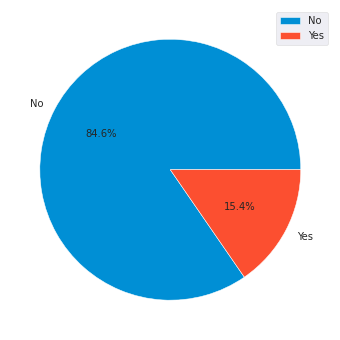

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
print(df_train['Is_Lead'].value_counts())
plt.pie(df_train['Is_Lead'].value_counts(), labels=['No', 'Yes'], autopct='%.1f%%')
plt.legend()
plt.savefig('Class_Imbalance.png')

***Data di atas termasuk data imbalance. 85% pelanggan tidak tertarik untuk menggunakan kartu kredit dan 15% pelanggan tertarik.***

### Gender

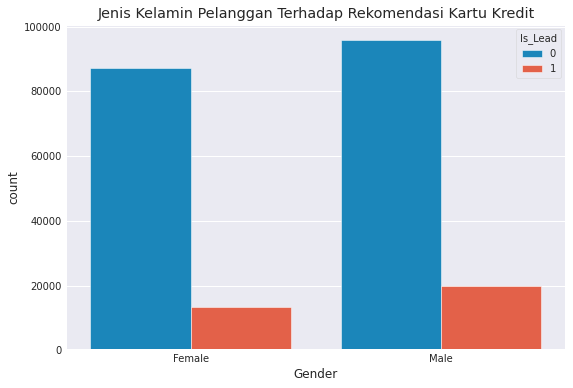

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Gender', hue='Is_Lead')
plt.title('Jenis Kelamin Pelanggan Terhadap Rekomendasi Kartu Kredit');
plt.savefig('Gender.png')

**Grafik di atas menunjukkan bahwa pelanggan laki laki memiliki ketertarikan yang tinggi pada rekomendasi kartu kredit dibandingkan dengan pelanggan perempuan**

### Age

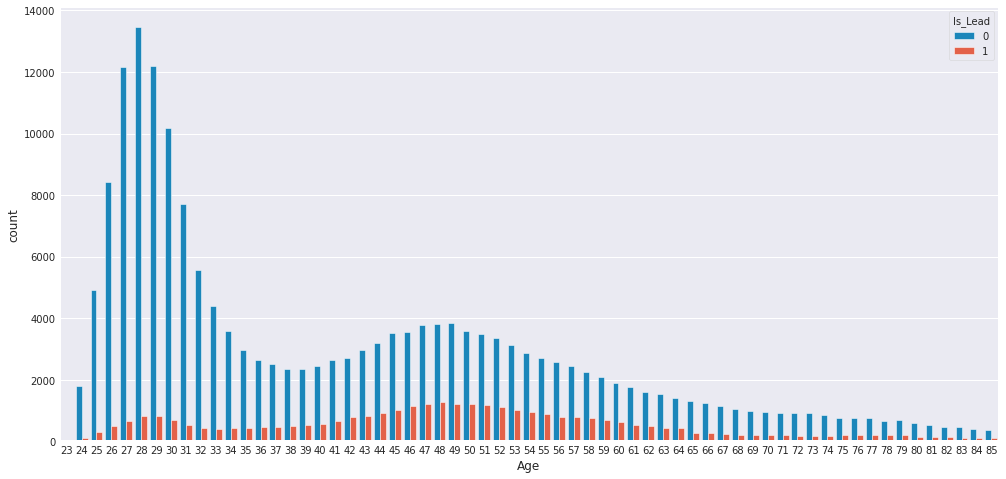

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_train, x='Age', hue='Is_Lead')
plt.savefig('age.png')

***Orang yang tertarik dengan rekomendasi kartu kredit kebanyak orang yang sudah berumur, yaitu mulai umur 30-an sampai dengan 50-an***

### Occupation

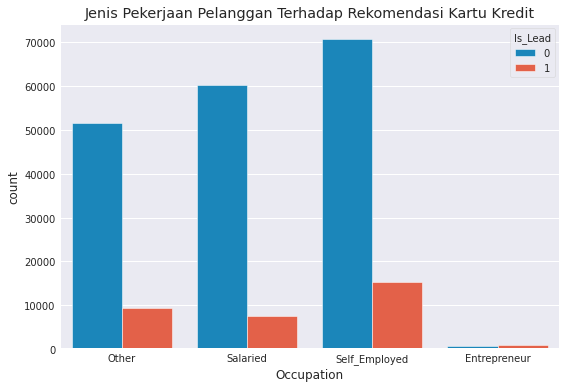

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Occupation', hue='Is_Lead')
plt.title('Jenis Pekerjaan Pelanggan Terhadap Rekomendasi Kartu Kredit');
plt.savefig('occupation.png')

***Pelanggan dengan jenis pekerjaan Self_Employed sangat tertarik pada rekomendasi kartu kredti dibandingkan dengan pelanggan jenis pekerjaan lainnya***

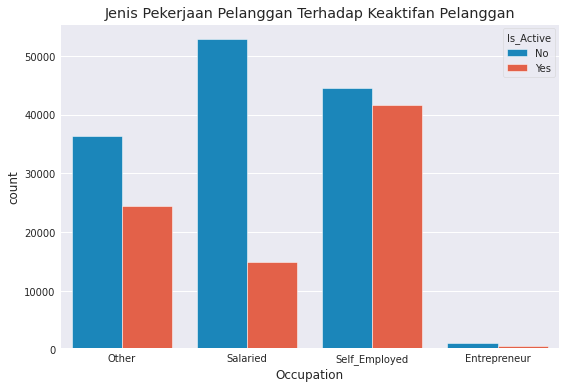

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Occupation', hue='Is_Active')
plt.title('Jenis Pekerjaan Pelanggan Terhadap Keaktifan Pelanggan');
plt.savefig('aktif.png')

***Pelanggan Self_Employed lebih aktif pada 3 bulan terakir dibandingkan dengan pelanggan lainnya.***

### Channel Code

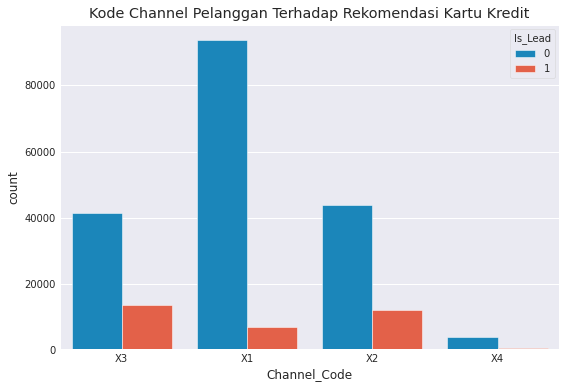

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Channel_Code', hue='Is_Lead')
plt.title('Kode Channel Pelanggan Terhadap Rekomendasi Kartu Kredit');
plt.savefig('channel.png')

**Pelanggan yang datang dari channel X3 dan X2 lebih tertarik terhadap rekomendasi kartu kredit dibandingkan dengan yang lainnya. Pelanggan yang datang dari channel X1 cenderung tidak tertarik dengan rekomendasi kartu kredit**

### Account Age

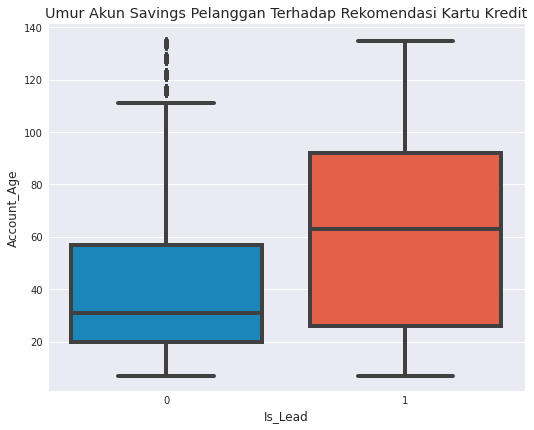

In [ ]:
sns.catplot(x='Is_Lead', y='Account_Age', kind='box', data=df_train).fig.set_size_inches(8,6);
plt.title('Umur Akun Savings Pelanggan Terhadap Rekomendasi Kartu Kredit');

***Pelanggan yang sudah lama membuka akun savings cenderung tertarik terhadap rekomendasi kartu kredit.***

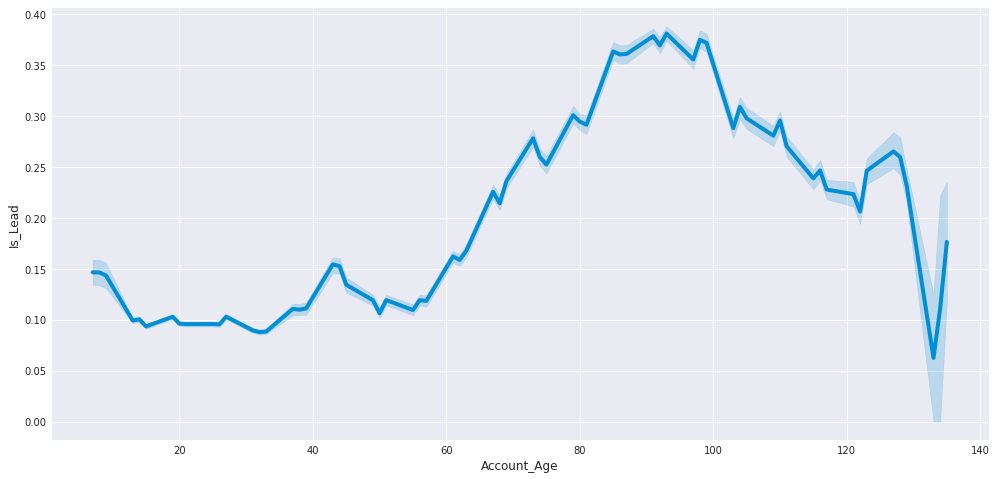

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_train, x='Account_Age', y='Is_Lead', ci=60)
plt.savefig('account_age.png')

### Region Code

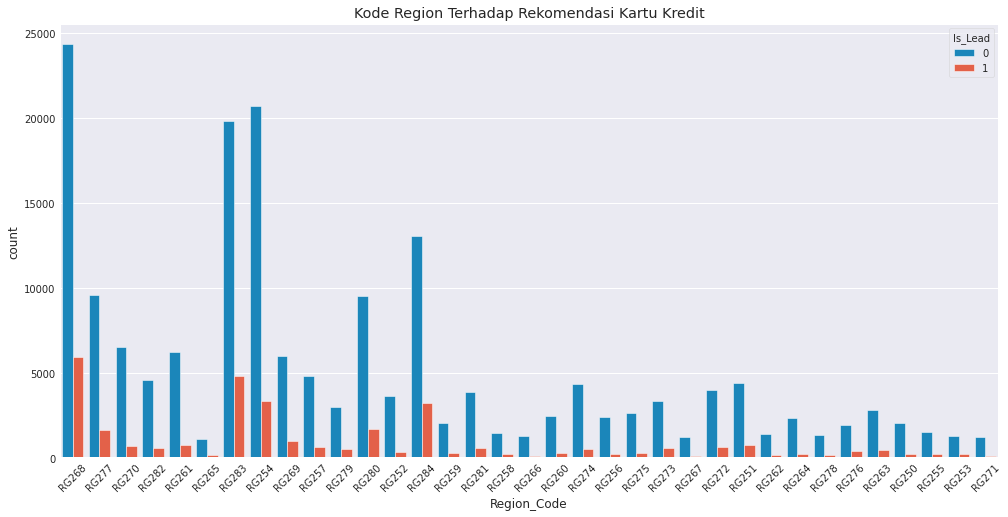

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Region_Code', hue='Is_Lead', data=df_train)
plt.xticks(rotation=45)
plt.title('Kode Region Terhadap Rekomendasi Kartu Kredit');
plt.savefig('region.png')

***Setiap region memiliki trend yang berbeda beda. Region <font color='red'>RG268</font>, <font color='red'>RG283</font>, dan <font color='red'>RG254</font> memiliki ketertarikan yang tinggi terhadap rekomendasi kartu kredit***

### Credit Product

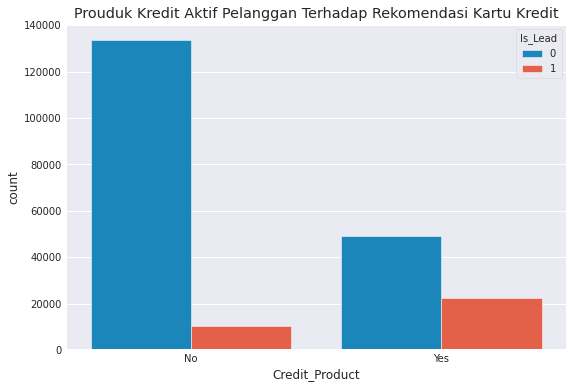

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Credit_Product', hue='Is_Lead')
plt.title('Prouduk Kredit Aktif Pelanggan Terhadap Rekomendasi Kartu Kredit');
plt.savefig('credit.png')

***Pelanggan yang memiliki produk kredit aktif memiliki ketertarikan yang tinggi terhadap rekomendasi kartu kredit dibandingkan dengan pelanggan yang tidak memiliki produk kredit aktfi.***

## DATA PRE-PROCESSING

In [ ]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
label_encode=LabelEncoder()
columns_cat=['Gender', 'Is_Active','Occupation', 'Channel_Code','Credit_Product',"Region_Code"]
df_train[columns_cat]=df_train[columns_cat].apply(label_encode.fit_transform)
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [ ]:
label_encode=LabelEncoder()
columns_cat=['Gender', 'Is_Active','Occupation', 'Channel_Code','Credit_Product',"Region_Code"]
df_test[columns_cat]=df_test[columns_cat].apply(label_encode.fit_transform)
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,4,1,0,25,1,742366,0
2,VK3KGA9M,1,31,20,2,0,14,0,215949,0
3,TT8RPZVC,1,29,22,1,0,33,0,868070,0
4,SHQZEYTZ,0,29,20,1,0,19,0,657087,0
5,MZZAQMPT,1,60,18,3,2,110,0,4624262,0


In [ ]:
# Avg_Account_Balance di log
df_train['Avg_Account_Balance']=np.log(df_train['Avg_Account_Balance'])

# diaplikasikan standard scaler pada numerik
s_scaler = StandardScaler()
columns_num = ['Age','Account_Age','Avg_Account_Balance']
df_train[columns_num] = s_scaler.fit_transform(df_train[columns_num])

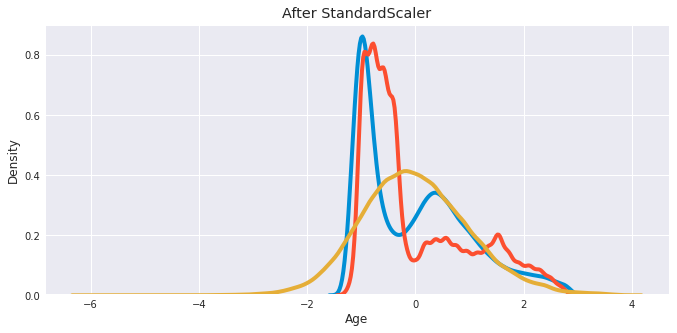

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_train['Age'], ax=ax1)
sns.kdeplot(df_train['Account_Age'], ax=ax1)
sns.kdeplot(df_train['Avg_Account_Balance'], ax=ax1);

## FEATURE ENGINEERING

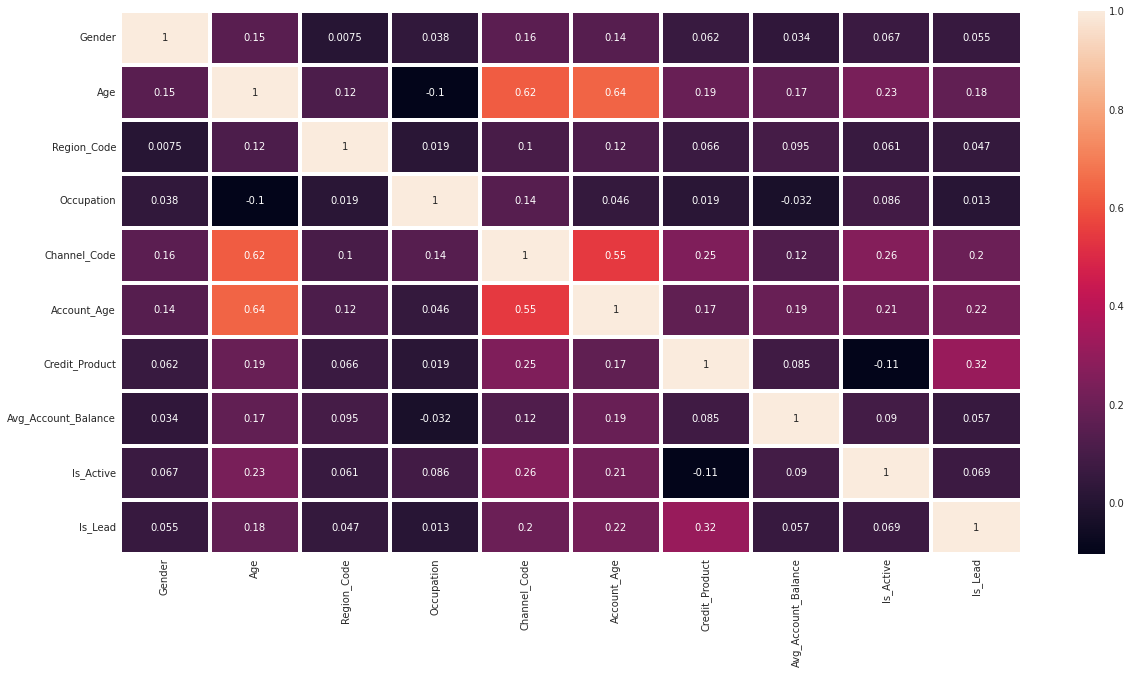

In [ ]:
fig=plt.figure(figsize=(18,10))
ax = plt.axes() 

sns.heatmap(data=df_train.corr(), annot=True, linewidth=3);

***Dari grafik heatmap di atas bisa dilihat bahwa tidak ada fitur yang benar benar tidak berkorelasi satu sama lain. Hal ini menunjukkan setiap fitur memiliki fungsinya masing masing. Oleh karena itu, saya akan menggunakan semua fitur yang ada, yaitu ada 9 fitur.***

In [ ]:
X = df_train.drop(['Is_Lead', 'ID'], axis=1)
Y = df_train['Is_Lead']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

## MODELING & EVALUATION

### Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy(lr, X_test, y_test)

Accuracy of the model is 84.77%
Precision: 0.6789
Recall: 0.5402
fscore: 0.5401
ROC AUC: 54.02


In [ ]:
cv_scores(lr, X_train, y_train)

CV Scores ROC AUC: 76.85


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accuracy(rf, X_test, y_test)

Accuracy of the model is 85.48%
Precision: 0.7134
Recall: 0.6120
fscore: 0.6367
ROC AUC: 61.20


In [ ]:
cv_scores(rf, X_train, y_train)

CV Scores ROC AUC: 77.23


### Model Improvement with SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,Y)

***Digunakan teknik SMOTE untuk data augmentasi dari data yang imbalance. Metode oversampling yang digunakan yaitu 'minority'. Sehingga, data yang diresample hanya data yang memiliki jumlah yang paling sedikit alias data kelas minoritas***

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
lr_new = LogisticRegression(random_state=42)
lr_new.fit(X_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy(lr_new, X_test_new, y_test_new)

Accuracy of the model is 69.94%
Precision: 0.6996
Recall: 0.6994
fscore: 0.6994
ROC AUC: 69.94


In [ ]:
cv_scores(lr_new, X_train_new, y_train_new)

CV Scores ROC AUC: 77.28


#### Random Forest Classifier

In [ ]:
rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accuracy(rf_new, X_test_new, y_test_new)

Accuracy of the model is 90.33%
Precision: 0.9034
Recall: 0.9033
fscore: 0.9033
ROC AUC: 90.33


In [ ]:
cv_scores(rf_new, X_train_new, y_train_new)

CV Scores ROC AUC: 96.15


## LOAD AND PREDICT NEW DATA

In [ ]:
X_predict = df_test.drop(['ID'], axis=1)

In [ ]:
new_predict = rf_new.predict(X_predict)
new_predict_proba = rf_new.predict_proba(X_predict)
pred = df_test_unencoded
#pred['Is_Lead_Probabilities'] = new_predict_proba[:, 1]
pred['Is_Lead'] = new_predict

In [ ]:
pred.sample(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
46258,BPOHIXTQ,Female,31,RG257,Other,X1,21,No,611732,No,0
29330,YXJZKXMM,Female,54,RG268,Self_Employed,X2,67,Yes,1255941,No,0
61087,2A82YBGH,Male,35,RG264,Salaried,X1,27,Yes,271005,No,1
78079,BUEMEVH9,Male,42,RG254,Self_Employed,X2,32,Yes,1482748,No,0
98637,M35SJNXG,Male,84,RG280,Other,X2,27,No,839670,Yes,0
35554,HHJC4VI6,Female,29,RG268,Salaried,X1,25,No,948054,No,1
86120,AAMUJH5E,Male,39,RG280,Self_Employed,X3,26,Yes,631900,No,0
2951,QUNREKBC,Female,34,RG283,Self_Employed,X3,50,No,2590033,No,0
21562,XHFEDNU4,Female,47,RG280,Self_Employed,X2,61,No,1347824,Yes,0
82198,VJJ5BEZU,Male,35,RG270,Salaried,X1,31,No,1840244,No,1


In [ ]:
pred[(pred['ID'] == 'EGQJJ28A')]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_Age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
54752,EGQJJ28A,Male,47,RG268,Entrepreneur,X3,69,Yes,2095122,Yes,0


## KESIMPULAN/SARAN

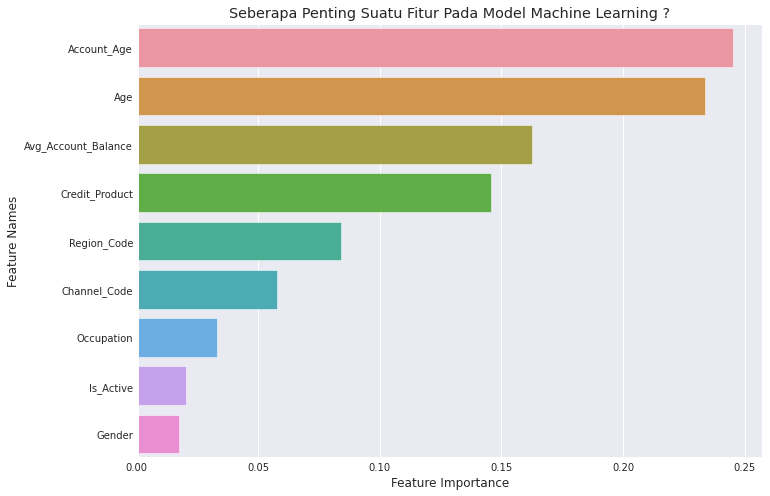

<Figure size 432x288 with 0 Axes>

In [ ]:
feature_importance = np.array(rf_new.feature_importances_)
feature_names = np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.title('Seberapa Penting Suatu Fitur Pada Model Machine Learning ?')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()
plt.savefig('feature2.png')

***Model yang memiliki performa yang paling bagus yaitu RandomForestClassifier dengan nilai Area Under the Curve dan Akurasi mencapai 90% dan nilai dari cross validation scores dengan scoring ROC AUC mencapai 96%. Fitur yang paling penting pada model tersebut yaitu Account_Age. Fitur tersebut merupakan berapa lama akun saving dibuka. Semakin lama akun tersebut dibuka, maka pelanggan semakin tertarik dengan rekomendasi kartu kredit.***